# Part 1: Modeling Stock Price Dynamics as Markov Processes

The code imported from `rl` can be found [here](https://github.com/sunnyliketheweather94/machine-learning-and-more/blob/main/projects/reinforcement_learning/foundations/rl).

In [7]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.path.abspath("."), os.pardir)))

import itertools
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np

from rl.distributions import Categorical, Constant
from rl.markov_process import MarkovProcess, NonTerminal, State
from rl.math import get_logistic_function

In [ ]:
@dataclass(frozen=True)
class StateMP1:
    price: int


@dataclass
class StockPriceMP1(MarkovProcess[StateMP1]):
    level: int  # mean-reversion level
    alpha: float  # strength of mean-reversion (must be non-negative)

    def up_prob(self, state: StateMP1) -> float:
        return get_logistic_function(alpha=self.alpha)(self.level - state.price)

    def transition(self, state: NonTerminal[StateMP1]) -> Categorical[State[StateMP1]]:
        up_prob = self.up_prob(state=state.state)

        return Categorical(
            distribution={
                NonTerminal(StateMP1(price=state.state.price + 1)): up_prob,
                NonTerminal(StateMP1(price=state.state.price - 1)): 1.0 - up_prob,
            }
        )

In [9]:
def process1_price_traces(
    start_price: int,
    level: int,
    alpha: float,
    time_steps: int,
    num_traces: int,
) -> np.ndarray:
    mp = StockPriceMP1(level=level, alpha=alpha)

    start_state_distribution = Constant(NonTerminal(StateMP1(price=start_price)))

    return np.vstack(
        [
            np.fromiter(
                (
                    s.state.price
                    for s in itertools.islice(
                        mp.simulate(start_state_distribution=start_state_distribution),
                        time_steps + 1,
                    )
                ),
                float,
            )
            for _ in range(num_traces)
        ]
    )

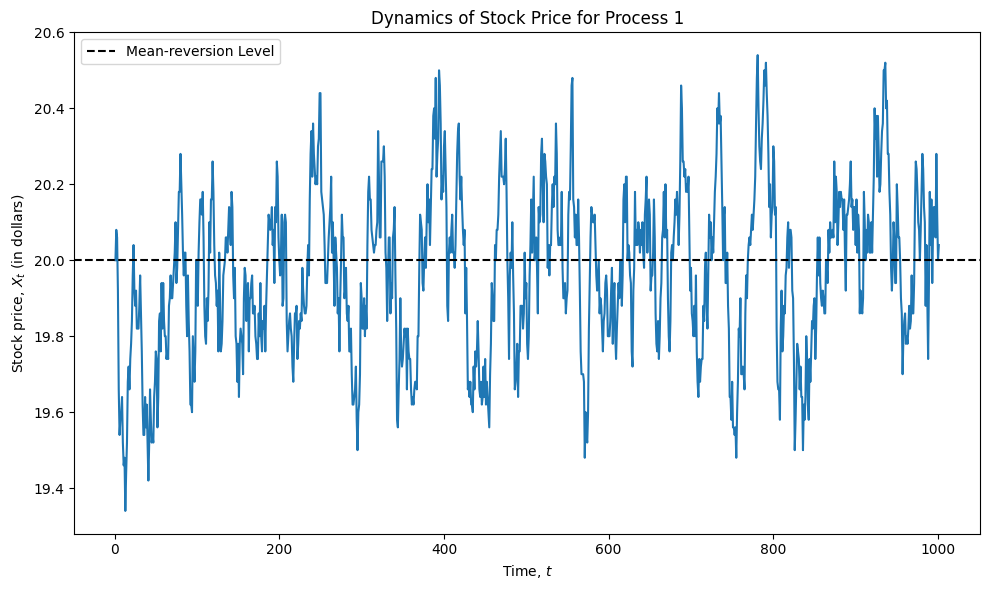

In [11]:
traces = process1_price_traces(
    start_price=20,
    level=20,
    alpha=0.2,
    time_steps=1_000,
    num_traces=100,
)

traces = traces.T
traces = np.mean(traces, axis=1)

plt.subplots(figsize=(10, 6))
plt.plot(range(1, traces.shape[0] + 1), traces)
plt.axhline(20, linestyle="--", color="black", label="Mean-reversion Level")

plt.title("Dynamics of Stock Price for Process 1")
plt.xlabel("Time, $t$")
plt.ylabel("Stock price, $X_t$ (in dollars)")

plt.legend()
plt.tight_layout()
plt.show()

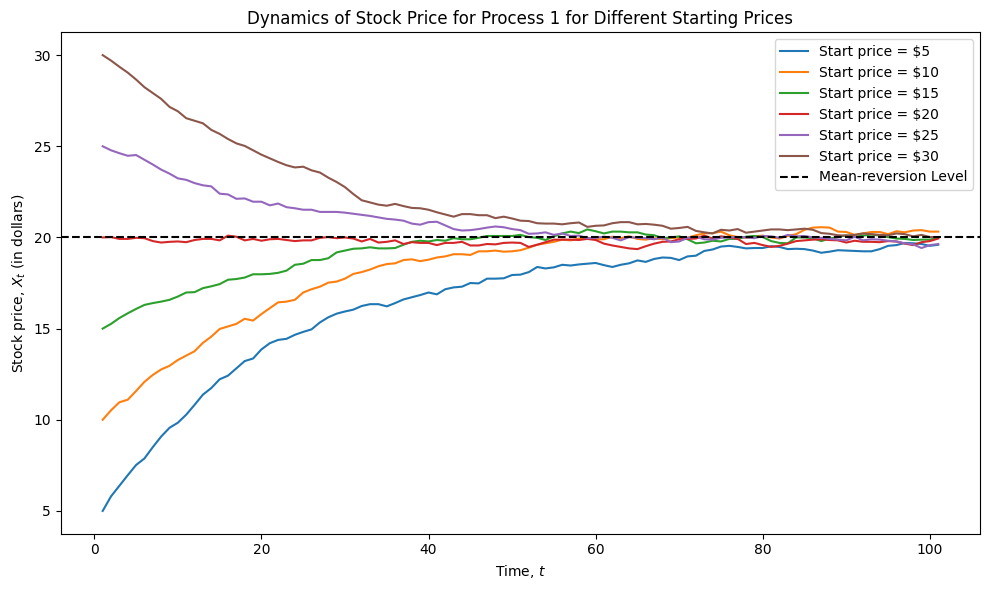

In [18]:
plt.subplots(figsize=(10, 6))


for start_price in [5, 10, 15, 20, 25, 30]:
    traces = process1_price_traces(
        start_price=start_price,
        level=20,
        alpha=0.1,
        time_steps=100,
        num_traces=100,
    )

    traces = traces.T
    traces = np.mean(traces, axis=1)

    plt.plot(
        range(1, traces.shape[0] + 1),
        traces,
        label=f"Start price = ${start_price}",
    )

plt.axhline(20, linestyle="--", color="black", label="Mean-reversion Level")

plt.title("Dynamics of Stock Price for Process 1 for Different Starting Prices")
plt.xlabel("Time, $t$")
plt.ylabel("Stock price, $X_t$ (in dollars)")

plt.legend()
plt.tight_layout()
plt.show()

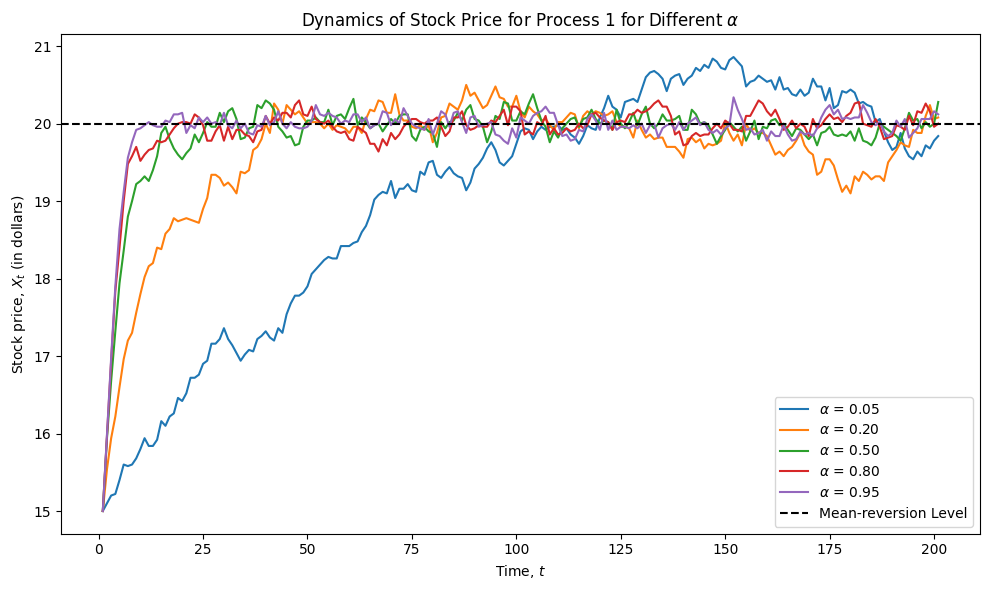

In [20]:
plt.subplots(figsize=(10, 6))


for alpha in [0.05, 0.2, 0.5, 0.8, 0.95]:
    traces = process1_price_traces(
        start_price=15,
        level=20,
        alpha=alpha,
        time_steps=200,
        num_traces=100,
    )

    traces = traces.T
    traces = np.mean(traces, axis=1)

    plt.plot(
        range(1, traces.shape[0] + 1),
        traces,
        label=f"$\\alpha$ = {alpha:.2f}",
    )

plt.axhline(20, linestyle="--", color="black", label="Mean-reversion Level")

plt.title("Dynamics of Stock Price for Process 1 for Different $\\alpha$")
plt.xlabel("Time, $t$")
plt.ylabel("Stock price, $X_t$ (in dollars)")

plt.legend()
plt.tight_layout()
plt.show()

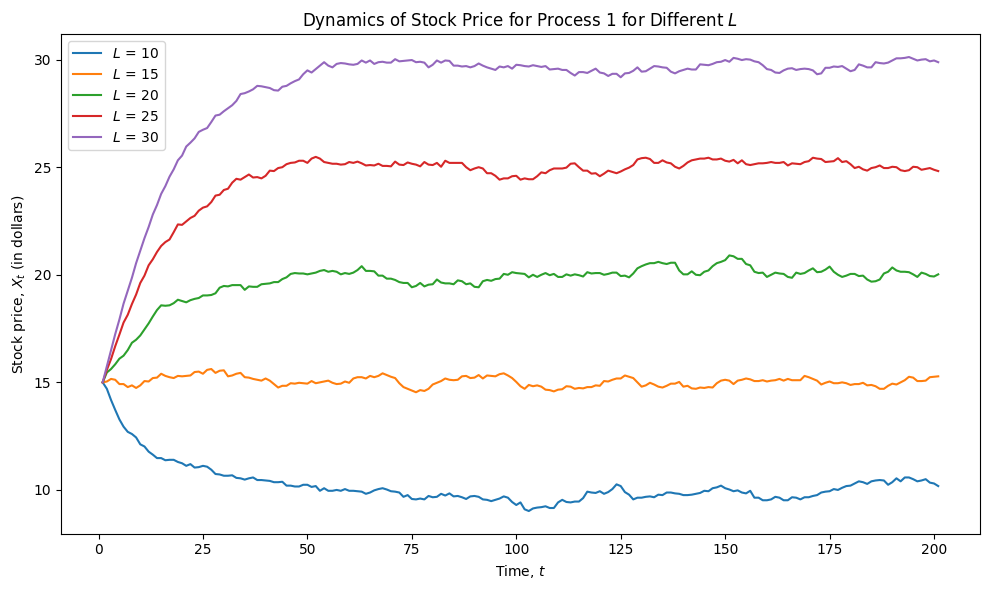

In [27]:
plt.subplots(figsize=(10, 6))


for level in [10, 15, 20, 25, 30]:
    traces = process1_price_traces(
        start_price=15,
        level=level,
        alpha=0.15,
        time_steps=200,
        num_traces=100,
    )

    traces = traces.T
    traces = np.mean(traces, axis=1)

    plt.plot(range(1, traces.shape[0] + 1), traces, label=f"$L$ = {level}")

plt.title("Dynamics of Stock Price for Process 1 for Different $L$")
plt.xlabel("Time, $t$")
plt.ylabel("Stock price, $X_t$ (in dollars)")

plt.legend()
plt.tight_layout()
plt.show()

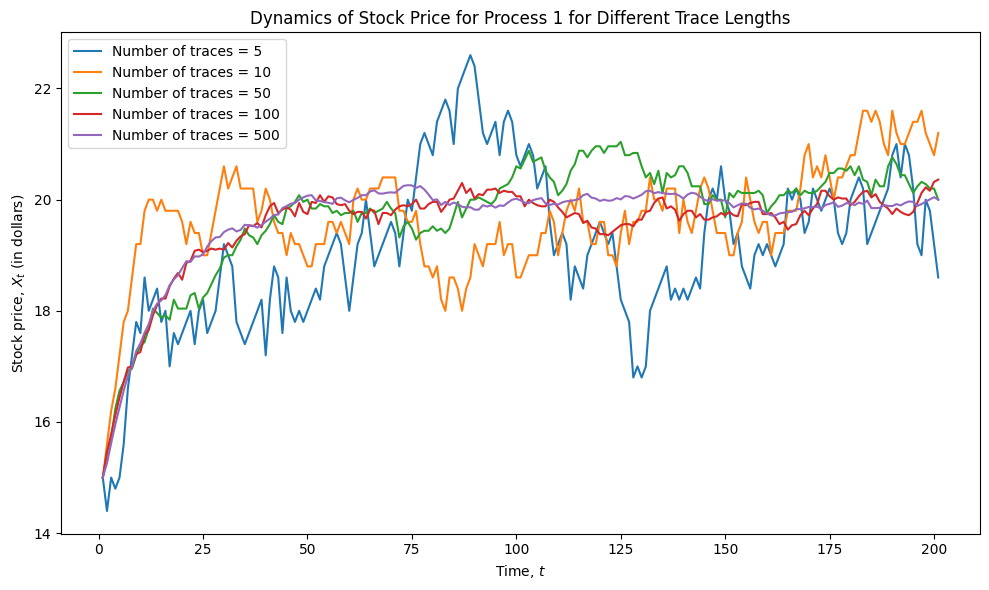

In [29]:
plt.subplots(figsize=(10, 6))


for n_trace in [5, 10, 50, 100, 500]:
    traces = process1_price_traces(
        start_price=15,
        level=20,
        alpha=0.15,
        time_steps=200,
        num_traces=n_trace,
    )

    traces = traces.T
    traces = np.mean(traces, axis=1)

    plt.plot(
        range(1, traces.shape[0] + 1), traces, label=f"Number of traces = {n_trace}"
    )

plt.title("Dynamics of Stock Price for Process 1 for Different Trace Lengths")
plt.xlabel("Time, $t$")
plt.ylabel("Stock price, $X_t$ (in dollars)")

plt.legend()
plt.tight_layout()
plt.show()